<a href="https://colab.research.google.com/github/erlichsefi/ScrapAnything/blob/main/segmented_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install pytesseract
!sudo apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (12.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like 

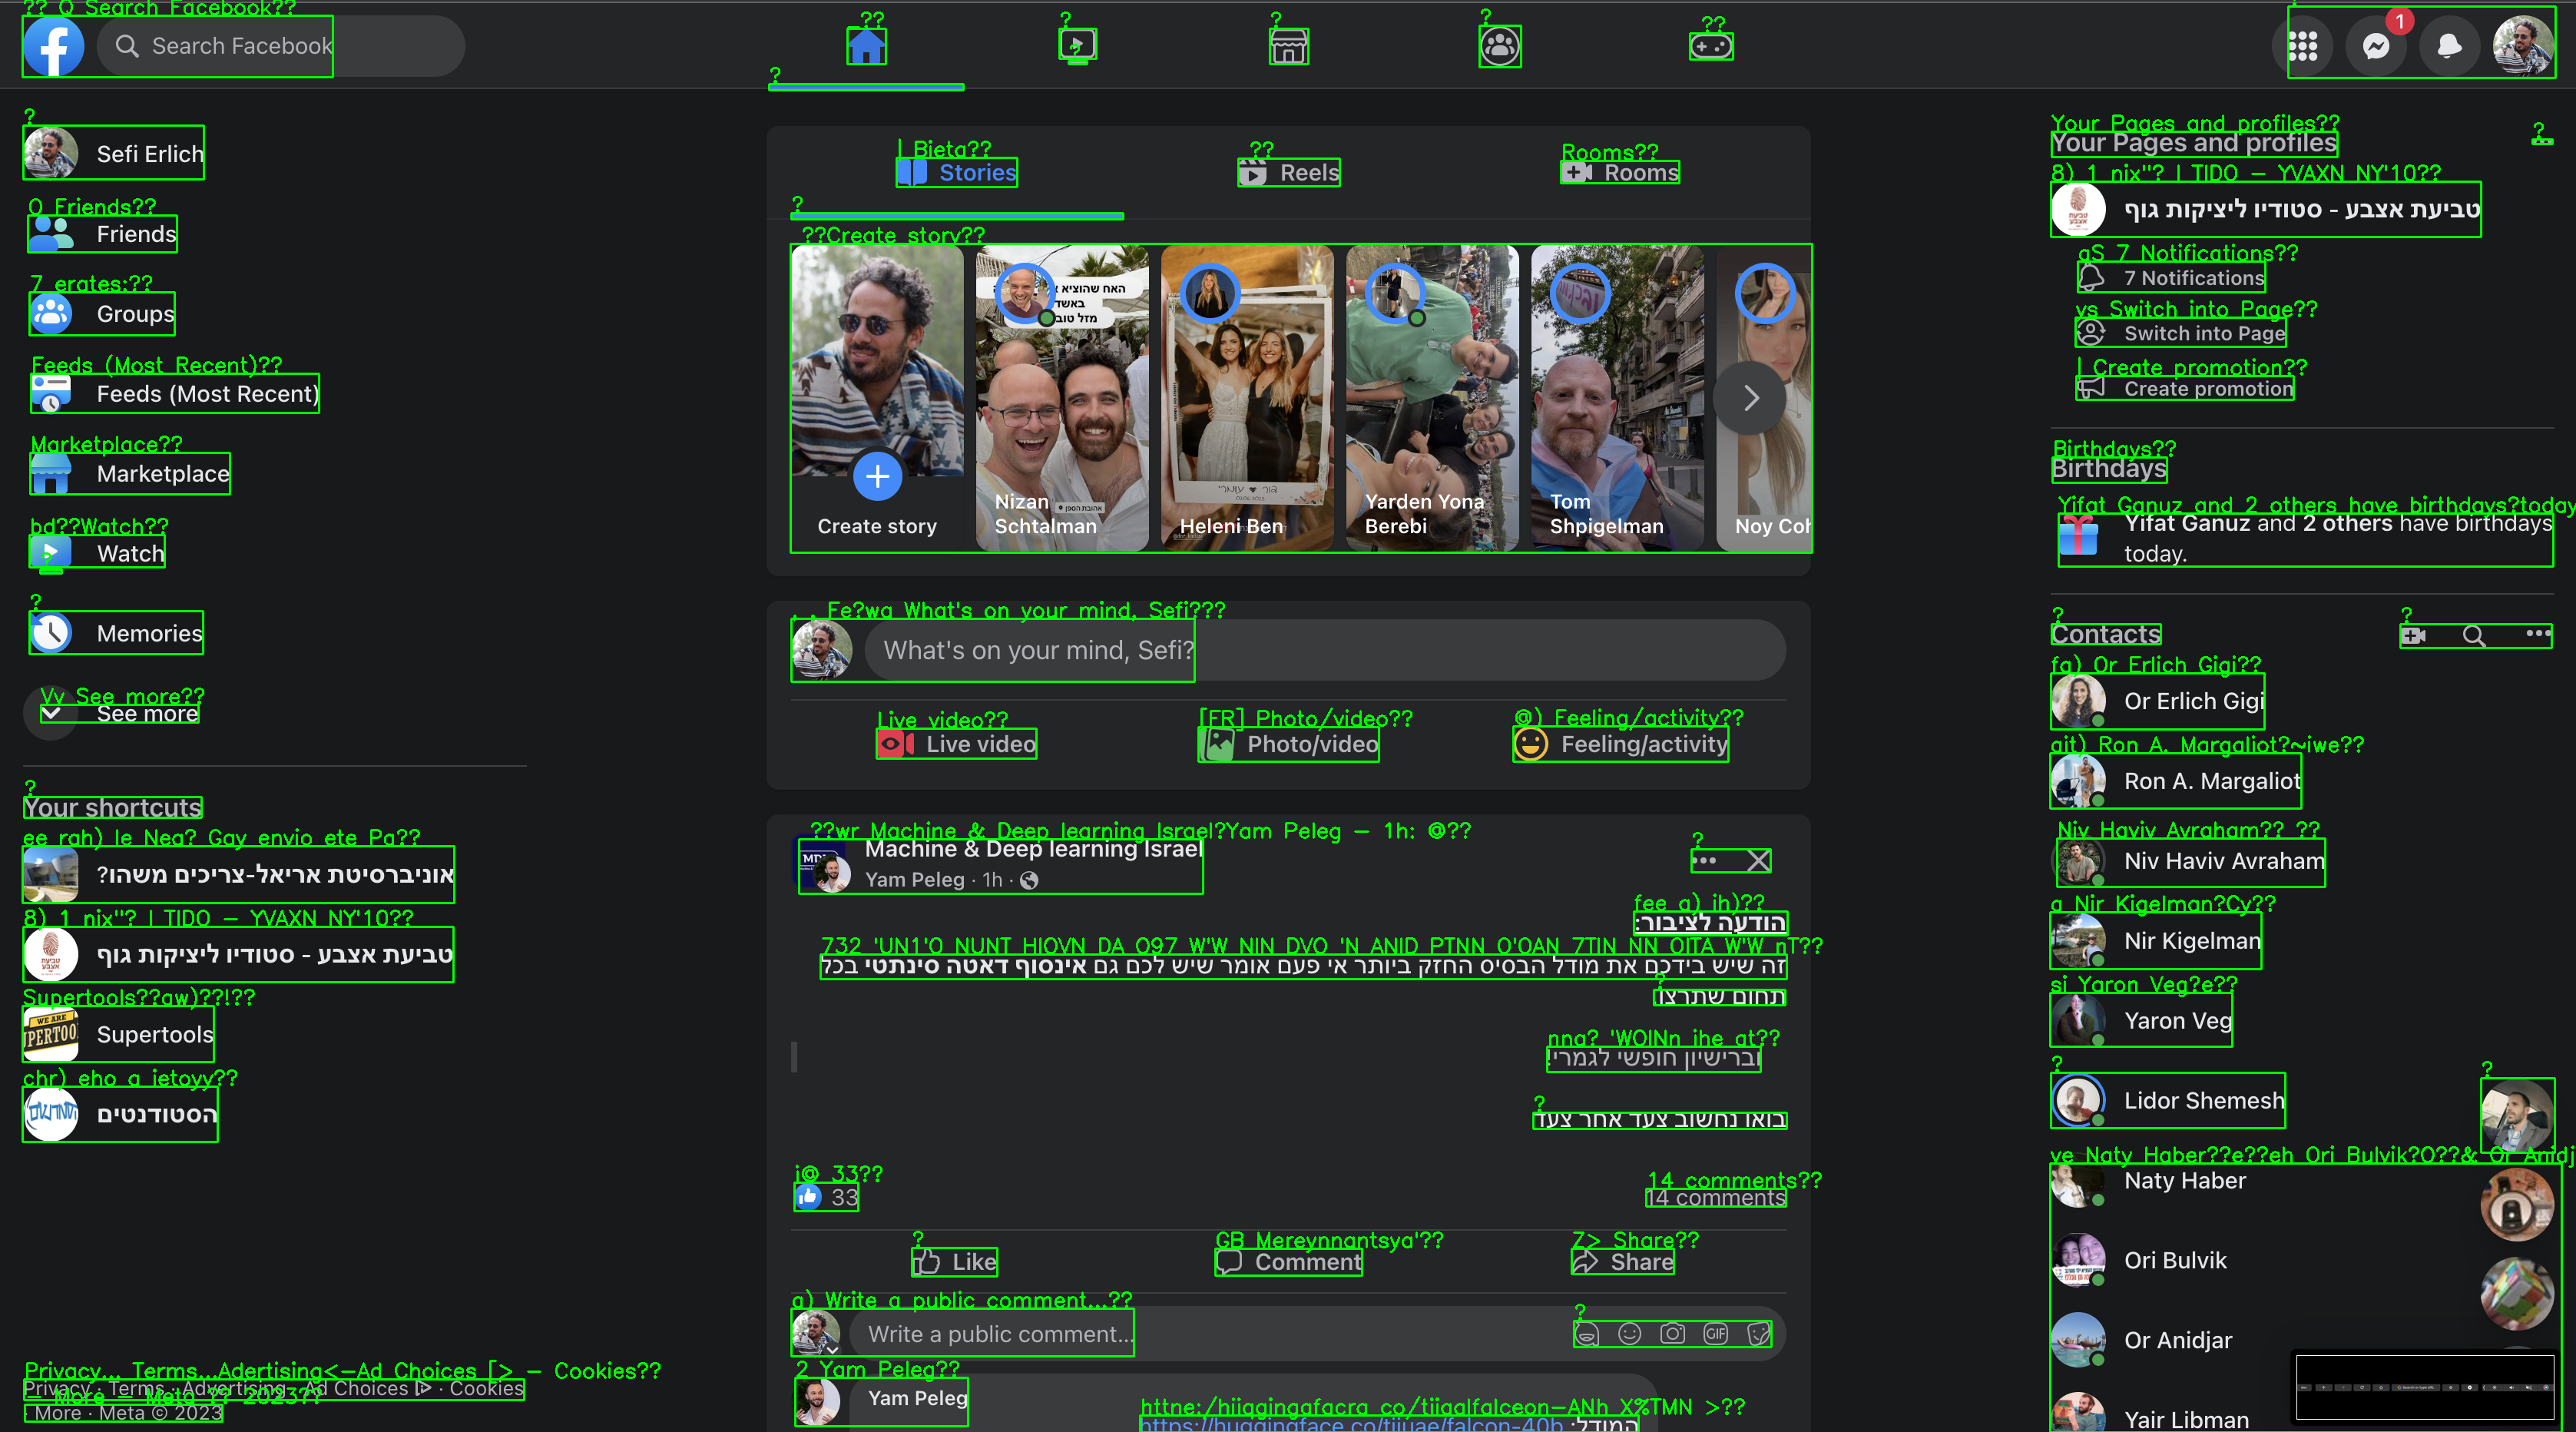

In [24]:
import pickle,cv2
from google.colab.patches import cv2_imshow


def load_bounding_boxes(filename):
  # open a file, where you stored the pickled data
  with open(f"/content/{filename}.pickle", 'rb') as file:
  # dump information to that file
    bounding_boxes = pickle.load(file)
  return bounding_boxes




def extract_features_from_image(masked_image):
    import pytesseract

    pytesseract.pytesseract.tesseract = r'/usr/local/bin/pytesseract'
    # find the text inside 
    return str(pytesseract.image_to_string(masked_image, lang='eng'))
    

def draw_bounding_boxes_with_text(filename):
    image = cv2.imread(filename)
    font_size = 2
    for box in load_bounding_boxes(filename):
        x, y, w, h = box
        text_in_image = extract_features_from_image(image[y:y+h-1,x:x+w-1])
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, text_in_image, (x , y - font_size ), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), font_size)  # Green text, thickness = 2

    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


draw_bounding_boxes_with_text("screen.png")

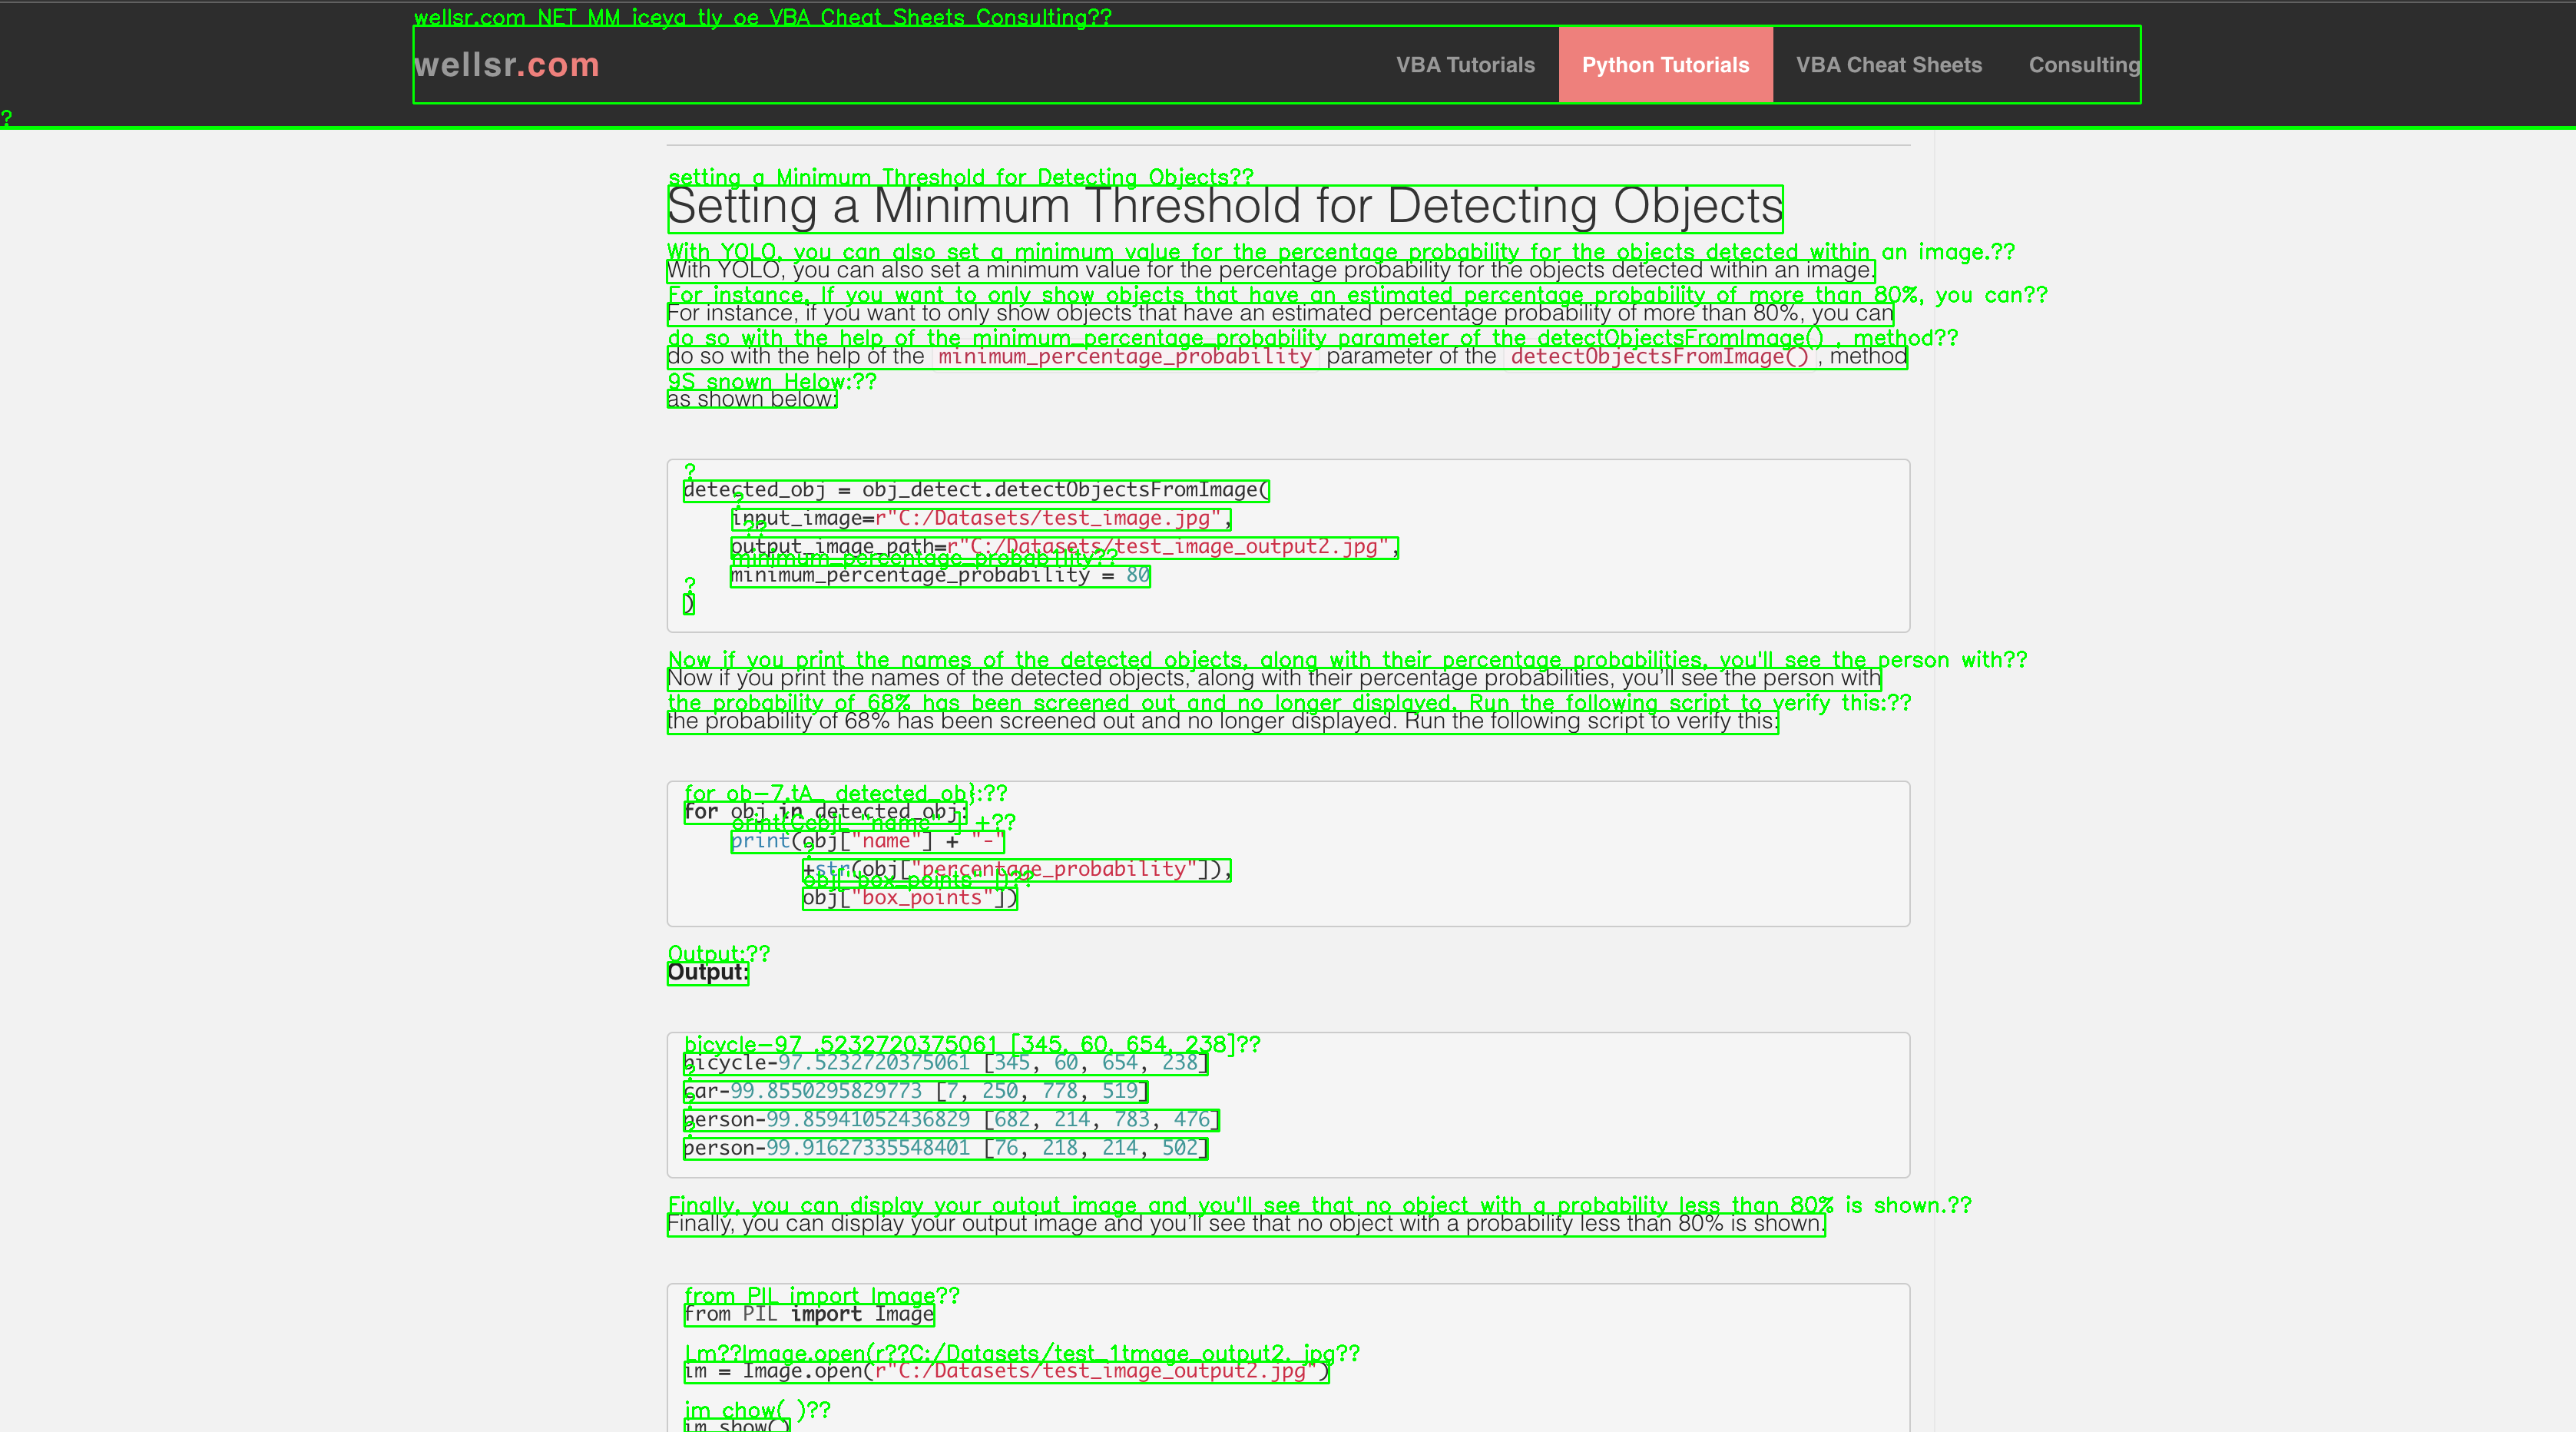

In [25]:
draw_bounding_boxes_with_text("screen1.png")

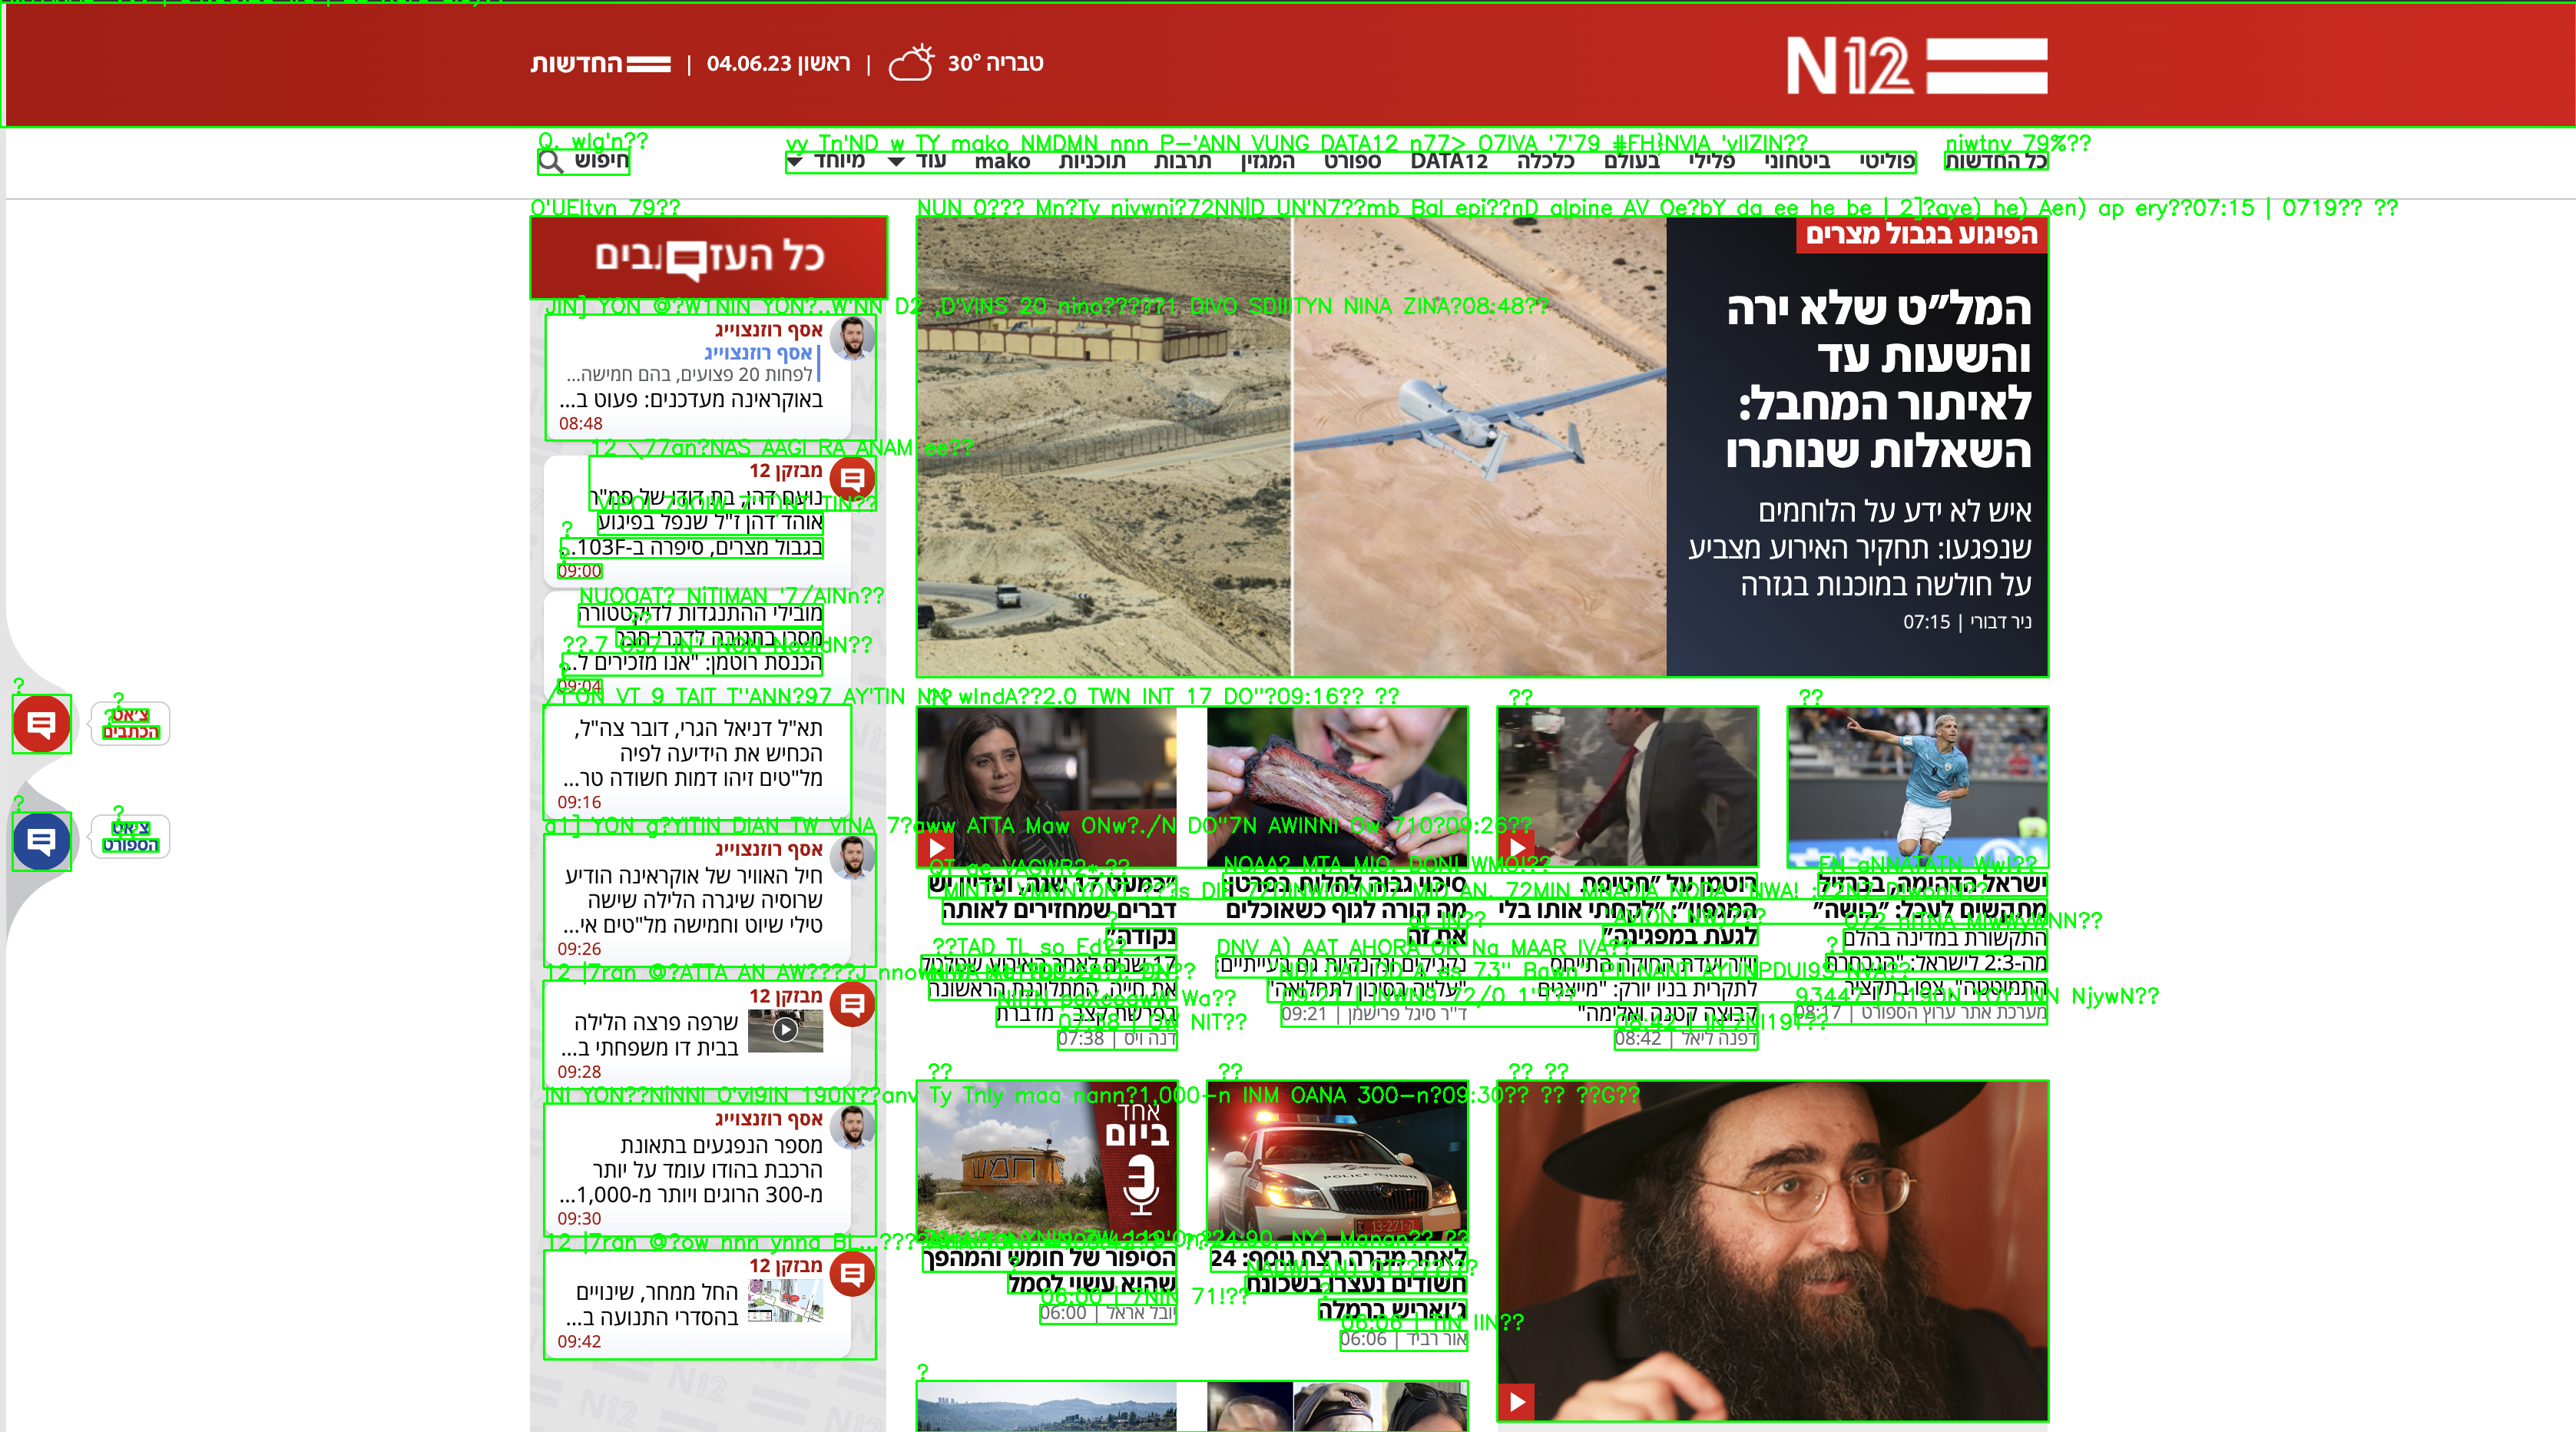

In [27]:
draw_bounding_boxes_with_text("screen3.png")

(1484, 1842, 649, 22)

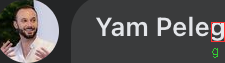

In [33]:
import pytesseract

pytesseract.pytesseract.tesseract = r'/usr/local/bin/pytesseract'
img = cv2.imread("screen.png")
x, y, w, h = load_bounding_boxes("screen.png")[2]
img = img[y:y+h,x:x+w,:]
hImg, wImg, _ = img.shape
boxes = pytesseract.image_to_boxes(img)
xy = pytesseract.image_to_string(img)
for b in boxes.splitlines():
  b = b.split(' ')

x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
cv2.rectangle(img, (x, hImg - y), (w, hImg - h), (50, 50, 255), 1)
cv2.putText(img, b[0], (x, hImg - y + 13), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (50, 205, 50), 1)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()